#### A little overview of the problem
- The SECOM dataset contains sensor data from a semiconductor manufacturing process. The data was collected over a period of 10 months, and includes 1567 instances with 590 attributes. Each instance is labeled as either 'pass' or 'fail', indicating whether the semiconductor chip produced during that instance passed quality assurance testing or not.

- The measurements in the data are related to the manufacturing process of semiconductor chips. The data contains 590 process parameters or measurements taken during the manufacturing process of these chips. These measurements include data from different sensors used during the manufacturing process such as capacitance, voltage, current, and temperature measurements.

- The problem with this dataset is to build a machine learning model that can predict whether a chip will pass quality assurance testing or not, based on the sensor measurements. This is a binary classification problem.

- The analysis method involves exploring the dataset, performing data cleaning and preprocessing as needed, selecting relevant features, and training a machine learning model to classify the chips as pass or fail. Some common approaches to binary classification include logistic regression, decision trees, random forests, and neural networks. The performance of the model can be evaluated using metrics such as accuracy, precision, recall, F1 score, and ROC AUC.

- It is important to note that the SECOM dataset is imbalanced, with only about 10% of the instances labeled as failures. This means that special care must be taken to prevent the model from becoming biased towards predicting that all chips will pass. Techniques such as oversampling the minority class, undersampling the majority class, or using more advanced methods such as SMOTE or ADASYN can be used to address this issue.

### Beneath are overall steps to follow.

Here is a general step-by-step approach to processing the data in a robust way:

1. Load the data: Load the data into a Python environment, such as Jupyter Notebook or Spyder, using a library such as Pandas. Ensure that the data is in a format that can be easily manipulated and analyzed.

2. Explore the data: Use summary statistics, such as mean, median, and standard deviation, to gain an understanding of the data. Look for patterns or anomalies in the data that may need to be addressed.

3. Clean the data: Address any missing or invalid values in the data. This may involve filling in missing values using imputation methods or removing observations with missing values. Outliers or extreme values may also need to be identified and addressed.

4. Feature engineering: Create new features from the existing variables that may be useful in predicting the target variable. This may involve scaling or transforming variables, creating interaction terms, or extracting information from time series data.

5. Split the data: Split the data into training and test sets to evaluate model performance. Use cross-validation techniques to further evaluate model performance.

6. Model selection: Select an appropriate model for the data. This may involve testing various models, such as linear regression, decision trees, or neural networks, to determine which model performs best.

7. Model tuning: Optimize the parameters of the selected model to improve performance on the test set. This may involve techniques such as grid search or randomized search.

8. Model evaluation: Evaluate the final model on the test set to determine its performance. Use metrics such as accuracy, precision, recall, and F1 score to assess the model's performance.

8. Interpret the results: Analyze the results of the final model to gain insights into the data. Determine which variables are most important in predicting the target variable, and identify any patterns or trends in the data.

9. Deploy the model: Once the final model has been selected and evaluated, deploy it in a production environment to make predictions on new data.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

### Loading Chips data from UCL repository

In [5]:
# url for the data
def chipsSignalData(url, feat):
    
    # Reading the data
    df = pd.read_csv(url, sep =" ", header=None)
    numColumns = df.shape[1]
    colSize = range(1, numColumns + 1)
    colNames = [feat + str(i) for i in colSize]
    df.columns = colNames
    
    return df

# Data url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"
df = chipsSignalData(url, "feature_")

### Loading Label Data and Combine 

In [6]:
def combineLabelsWithData(url_label, names):
    
    # Read the labels into a pandas dataframe
    labels = pd.read_csv(url_label, sep=" ", 
                         header=None, 
                         names = names[1:])
    
    # concatenate the data and labels
    df.loc[:,names[0]] = labels[names[1]].values
    
    # insert date data into the first column of df
    df.insert(0, names[2], labels[names[2]].values)
    
    # Convert the date object to a datetime object
    df.loc[:,names[2]] = pd.to_datetime(df.date)

    return df
# URL for the labels (-1: pass, 1: fail) of quality assurance test
url_labels = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"
names = ['status', 'class', 'date']

df = combineLabelsWithData(url_labels, names)

In [7]:
# Display portion of the data on the screen
df.head()

,date,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590,status
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [8]:
# recode target variable -1 to 1
df.loc[:,'status'] = df['status'].replace([-1, 1], ['pass', 'fail'])

### Explore the data

In [9]:
# Calculate summary statistics
summary = df.describe()

# Print the summary statistics
print(summary)

         feature_1    feature_2    feature_3    feature_4    feature_5  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

       feature_6    feature_7    feature_8    feature_9   feature_10  ...  \
count     1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean       100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std          0.0     6.237214     0.008961     0.073897     0.015116  ...   
min        100.0    82.13

### Remove columns with high count of missing values

We remove columns having 90% or more missing values. With this, we removed 4 features from our further analysis. The function beneath does this trick. 

In [10]:
def removeColsWithHighMissing(data, threshold):
    
    # Checking Missing values per each feature 
    missingCount = data.isnull().mean()\
                    .to_frame(name = 'count')\
                    .sort_values('count')
    
    # Consider features with less than 10% missing
    dfMiss = data.loc[:,data.isnull().sum() < threshold]

    # Remove any columns with a high percentage of missing values
    data = data.loc[:, data.isnull().sum() < threshold]

#     # Fill in missing values for the remaining columns using (option: forward fill (ffill))
#     data.fillna(0, inplace=True)
    
    return missingCount, data

threshold = round(len(df) * 0.5, 0)
dfMiss, df = removeColsWithHighMissing(df, threshold)
print("number of columns with 90% or more missing values: {}".format(len(dfMiss.loc[dfMiss['count'] > 0.5,:])))
display(df)

number of columns with 90% or more missing values: 28


,date,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_578,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,feature_590,status
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,pass
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,pass
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,fail
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,pass
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,pass
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,pass
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,pass
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,pass


In [11]:
def removeColsWithConstValue(data):
    
    # Create a list of column names that have just a constant (single) value for the entire instances 
    constCols = []
    for col in data.columns:
        if data[col].nunique() <= 1:
            constCols.append(col)
    
    # Remove these features as they dont add any value to our task
    data = data.loc[:,data.columns.isin(constCols) == False]

#     # Fill in missing values for the remaining columns using (option: forward fill (ffill))
#     data.fillna(0, inplace=True)
    
    return constCols, data

constCols, df = removeColsWithConstValue(df)
print("Number of features with constant values:{}".format(len(constCols)))

Number of features with constant values:116


From the above function, it was found that there have been 116 features with constant values for all the instances. And we tend to assume that these columns would not bring any value in the chips quality assurance check. Conseqently, these features are excluded in our analysis. 

Now, we impute the missing values. As for signal data, missing may represent no signal. So, here we fill the missing values by 0. And given in the following function. 

In [12]:
def imputeMissingValues(data):

    # Fill in missing values for the remaining columns using (option: forward fill (ffill))
    data.fillna(0, inplace=True)
    
    return data
df = imputeMissingValues(df)

In [123]:
# make date as index
dfCopy = df.drop(columns=['date'])

### Further Exploration

In [124]:
# Count on 
dfCopy.groupby('status').size().to_frame('count')

,count
status,
fail,104
pass,1463


In [125]:
unique_vals = dfCopy['status'].unique()  # [0, 1, 2]
targets = [dfCopy.loc[dfCopy['status'] == val]\
           for val in dfCopy['status'].unique()]

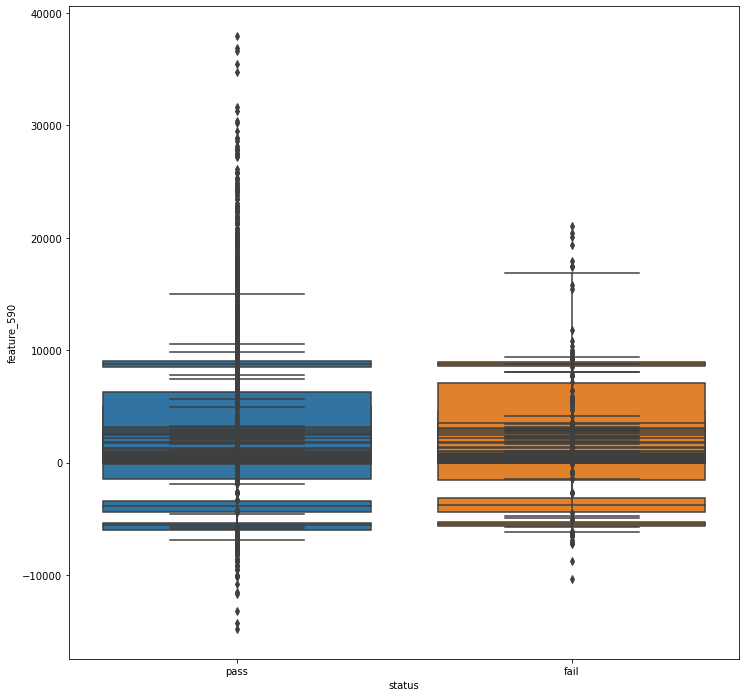

In [126]:
plt.figure(figsize=(12,12))

for col in dfCopy.columns:
    if col != 'status':
        sns.boxplot(x=dfCopy.status, 
                    y=dfCopy[col])

<AxesSubplot:>

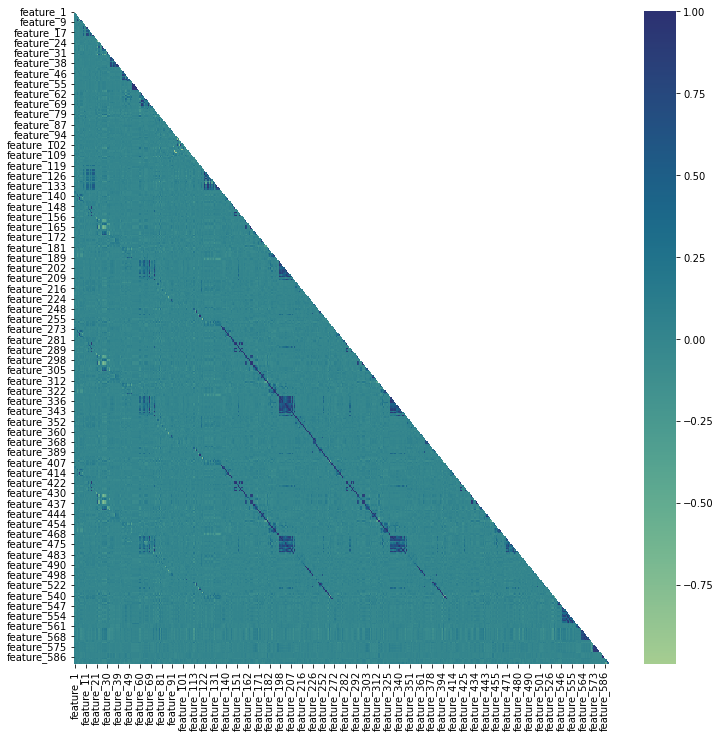

In [127]:
# Get correlation of features
dfCols = dfCopy.drop(columns=['status']).columns
dfCorr = dfCopy[dfCols].corr()

# heatmap of this
# Getting the Upper Triangle of the co-relation matrix
plt.figure(figsize=(12,12))
uppTriangle = np.triu(dfCorr)
sns.heatmap(dfCorr, fmt='.2g', mask=uppTriangle, cmap="crest")

In [ ]:
dfCopy['status'] = dfCopy['status'].map({'pass':0, 'fail':1})

In [233]:
# Split data into features and target
X = dfCopy.iloc[:, :-1].values
y = dfCopy.iloc[:, -1].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


from imblearn.over_sampling import SVMSMOTE, SMOTE
from imblearn.under_sampling import ClusterCentroids
from sklearn.naive_bayes import GaussianNB


cc=ClusterCentroids()
X_os_svm,y_os_svm =cc.fit_resample (X_train,y_train)
# Xcc_test,ycc_test   =cc.fit_resample (X_test,y_test)

# from xgboost import XGBClassifier
# xgb_model_os_SMOTE = XGBClassifier(objective='binary:logistic',eval_metric='logloss',random_state=123)
# smote = SVMSMOTE(random_state=123)
# X_os_svm,y_os_svm = smote.fit_resample(X_train, y_train)

# Define pipeline with PCA, scaling, and SVM classifier
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components=15)),
                 ('svm', SVC(kernel='rbf', C=4, gamma='scale', class_weight={0:1, 1:1}))])

# Fit pipeline to training data
# X_train = (X_train - X_train.mean())/(X_train.std())
# X_test = (X_test - X_test.mean())/(X_test.std())

# sT = StandardScaler()
# X_os_svm = sT.fit_transform(X_os_svm)
# X_test = sT.fit_transform(X_test)

# pipe = SVC(kernel='linear', C=4, gamma='scale', class_weight={0:1, 1:6})

pipe.fit(X_os_svm, y_os_svm)

# Evaluate pipeline on test data
predct = pipe.predict(X_test)
accuracy = pipe.score(X_test, y_test)
accuracyTrain = pipe.score(X_os_svm, y_os_svm)
print('Accuracy: {:.2f}%'.format(accuracy*100))
print('Accuracy Train: {:.2f}%'.format(accuracyTrain*100))

C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Accuracy: 59.87%
Accuracy Train: 96.99%


In [216]:
confuMat = pd.crosstab(y_test, predct)
confuMat

col_0,0,1
row_0,,
0,201,92
1,6,15


In [94]:
c00 = confuMat.iloc[0,0]
c01 = confuMat.iloc[0,1]
c10 = confuMat.iloc[1,0]
c11 = confuMat.iloc[1,1]

print("Over all accuracy: {:.2f}%".format(((c00 + c11)/(c00+c01+c10+c11))*100))
print('')
print("Recall for fail (Fail prediction): {:.2f}%".format((c00 / (c00 + c01))*100))

print('')
print("Recall for pass: {:.2f}%".format((c11 / (c10 + c11))*100))

print('')
print("""precision (of the total positive (fail) 
      predictions, what percentage is correct): {:.2f}%)
      """.format((c00 / (c00 + c10))*100))

print('')
 
print("""precision (of the total negative (pass) 
      predictions, what percentage is correct): {:.2f}%)
      """.format((c11 / (c01 + c11))*100))

Over all accuracy: 89.38%

Recall for fail (Fail prediction): 9.68%

Recall for pass: 95.00%

precision (of the total positive (fail) 
      predictions, what percentage is correct): 12.00%)
      

precision (of the total negative (pass) 
      predictions, what percentage is correct): 93.72%)
      


###### The pipeline beneath uses three classifiers: Support Vector Machines (SVM), Random Forest, and Logistic Regression. For each classifier, it applies the following steps:

<br>

<font color='skyblue'>
    <ol> 
        <li> Standardizes the features using StandardScaler.</li>
        <li> Performs Principal Component Analysis (PCA) to reduce the dimensionality of the feature space. </li>
        <li> Applies the classifier to the reduced feature space using default hyperparameters. </li>
        <li> Uses GridSearchCV to perform hyperparameter tuning on the classifier. </li>
    </ol>
 </font>

In [201]:
# Create pipeline for Scaling, PCA, classifiers
pipe_svc = Pipeline([('scl', StandardScaler()), 
                     ('pca', PCA(n_components=10)), 
                     ('clf', SVC(class_weight={0:1, 1:1},
                                 random_state=42))])
pipe_rf = Pipeline([('scl', StandardScaler()), 
                    ('pca', PCA(n_components=10)), 
                    ('clf', RandomForestClassifier(class_weight={0:1, 1:1},
                                                   random_state=42))])
pipe_lr = Pipeline([('scl', StandardScaler()), 
                    ('pca', PCA(n_components=10)), 
                    ('clf', LogisticRegression(class_weight={0:1, 1:1},
                                               random_state=42))])

# Set up grid search parameters
params_svc = {'clf__kernel': ['linear', 'rbf'], 
              'clf__C': [0.1, 1, 10, 100]}
params_rf = {'clf__n_estimators': [10, 50, 100], 
             'clf__max_depth': [10, 20, None]}
params_lr = {'clf__penalty': ['l2'], 
             'clf__C': [0.1, 1, 10]}

# Set up GridSearchCV for each classifier
grid_svc = GridSearchCV(pipe_svc, param_grid=params_svc, 
                        cv=5, scoring='accuracy')
grid_rf = GridSearchCV(pipe_rf, param_grid=params_rf, 
                       cv=5, scoring='accuracy')
grid_lr = GridSearchCV(pipe_lr, param_grid=params_lr, 
                       cv=5, scoring='accuracy')

# Fit the GridSearchCV objects
grid_svc.fit(X_os_svm, y_os_svm)
grid_rf.fit(X_os_svm, y_os_svm)
grid_lr.fit(X_os_svm, y_os_svm)

# Print best parameters and accuracy score for each classifier
classifiers = zip(["SVM", "Random Forest", "Logistic Regression"], 
                  [grid_svc, grid_rf, grid_lr])

for name, classifier in classifiers:
    print(name)
    print('Best parameters:', classifier.best_params_)
    print('Train accuracy:', classifier.best_score_)
    print('Test accuracy: {:.2f}%'.format(accuracy_score(y_test, 
                                        classifier.predict(X_test)) * 100))
    print('')

SVM
Best parameters: {'clf__C': 100, 'clf__kernel': 'rbf'}
Train accuracy: 0.8647173489278751
Test accuracy: 87.90%

Random Forest
Best parameters: {'clf__max_depth': None, 'clf__n_estimators': 100}
Train accuracy: 0.8925429041012116
Test accuracy: 92.36%

Logistic Regression
Best parameters: {'clf__C': 1, 'clf__penalty': 'l2'}
Train accuracy: 0.7455070137216679
Test accuracy: 92.36%



In [202]:
pred = grid_svc.predict(X_test)
pd.crosstab(y_test, pred)

col_0,0,1
row_0,,
0,272,21
1,17,4


In [19]:
list(set(y_test))

['fail', 'pass']

In [20]:
np.unique(y_train, return_counts=True)

(array(['fail', 'pass'], dtype=object), array([  80, 1173], dtype=int64))

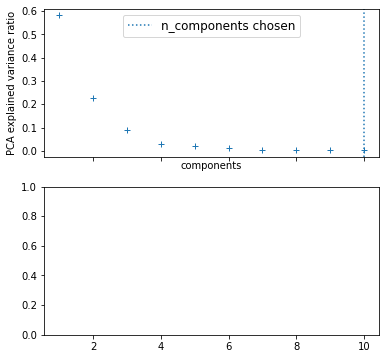

In [73]:
# Plot the PCA spectrum
pca = pipe_svc['pca']
pca.fit(X_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, 
                                sharex=True, figsize=(6, 6))

ax0.plot(np.arange(1, pca.n_components_ + 1), 
         pca.explained_variance_ratio_, "+", 
         linewidth=2)
ax0.set_xlabel("components")
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(grid_svc.best_estimator_.\
            named_steps["pca"].n_components,
            linestyle=":",
            label="n_components chosen")

ax0.legend(prop=dict(size=12))

In [74]:
# Define the model builder function for GridSearchCV
def create_model(neurons=20, dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_dim=20))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, 
                  metrics=['accuracy'])
    return model

# Define the parameter grid for GridSearchCV
param_grid = {
    'clf__neurons': [10, 20, 30],
    'clf__dropout_rate': [0.2, 0.3, 0.4],
    'clf__optimizer': ['adam', 'rmsprop']
}

# Create the KerasClassifier object for GridSearchCV
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# Create the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=20)),
    ('clf', model)
])

# Fit the GridSearchCV object
grid = GridSearchCV(pipe, param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Best parameters: ", grid.best_params_)
print("Training accuracy: ", grid.best_score_)

# Evaluate the model on the test set
accuracy = grid.best_estimator_.score(X_test, y_test)
print("Test accuracy: ", accuracy)

# Fit the best estimator on the training data again
best_model = grid.best_estimator_.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Plot the learning curves for the best model
history = best_model.named_steps['clf'].model.history
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_21808\2032484343.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)


Best parameters:  {'clf__dropout_rate': 0.2, 'clf__neurons': 10, 'clf__optimizer': 'adam'}
Training accuracy:  0.935353140036265
Test accuracy:  0.9171974658966064


ValueError: Pipeline.fit does not accept the epochs parameter. You can pass parameters to specific steps of your pipeline using the stepname__parameter format, e.g. `Pipeline.fit(X, y, logisticregression__sample_weight=sample_weight)`.

In [75]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
      
    model = keras.Sequential([
          keras.layers.Dense(
              16, activation='relu',
              input_shape=(10,)),  # train_features.shape[-1]
          keras.layers.Dropout(0.5),
          keras.layers.Dense(1, activation='sigmoid',
                             bias_initializer=output_bias),
      ])

    model.compile(
          optimizer=keras.optimizers.Adam(learning_rate=1e-3),
          loss=keras.losses.BinaryCrossentropy(),
          metrics=metrics)

    return model

EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

model = make_model()
model.summary()

Model: "sequential_120"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_240 (Dense)           (None, 16)                176       
                                                                 
 dropout_120 (Dropout)       (None, 16)                0         
                                                                 
 dense_241 (Dense)           (None, 1)                 17        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [76]:
# Create the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('clf', model)
])

In [77]:
pca = PCA(n_components=10)
pca.fit(X_train[:10])
val = pca.transform(X_train[:10])

In [78]:
val

array([[-3.93109022e+02, -3.63081241e+03, -1.56020516e+03,
         3.77606523e+02, -6.83765304e+02,  4.55283350e+02,
         7.60044182e+02,  4.21990960e+01, -4.86960379e+02,
        -8.84625706e-13],
       [-6.96819223e+03,  8.81944866e+03, -1.82302421e+03,
         1.15685144e+03,  5.46288779e+02,  7.42502015e+01,
        -1.64827624e+01, -7.79933309e+01, -2.76918752e+02,
         6.59028387e-12],
       [-6.14458226e+02, -3.81560895e+03, -1.23330910e+03,
         4.28882011e+02,  9.45588173e+02,  2.02337908e+02,
        -2.26700490e+02,  8.20703994e+02,  8.25010955e+01,
        -1.26831878e-12],
       [-5.00227804e+03, -9.22911643e+02,  6.27031738e+03,
         3.17166854e+03, -1.32245722e+02,  2.16945076e+01,
        -1.79062838e+01, -8.91992146e+00,  2.08207504e+01,
         4.50484094e-12],
       [-4.86102148e+03,  1.71661420e+03, -4.27921216e+02,
        -2.42791060e+03, -9.01143775e+02, -7.71225638e+02,
         2.12570100e+02,  3.90351692e+02,  2.87808582e+02,
         1.

In [79]:

yy = pd.Series(y)
yy = yy.replace(['pass', 'fail'], [0,1])

yy = np.array(yy)
    
model.fit(val[:10], yy[:10])

1/1 [==============================] - 1s 732ms/step - loss: 684.3483 - tp: 0.0000e+00 - fp: 5.0000 - tn: 4.0000 - fn: 1.0000 - accuracy: 0.4000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.2222 - prc: 0.0614


In [80]:
model.predict(val[:10])

1/1 [==============================] - 0s 32ms/step


array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [81]:
results = model.evaluate(val[:10], yy[:10], batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 385.5125


In [82]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [83]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    val[:10], yy[:10],
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val[:10], yy[:10]), 
    verbose=0)

In [84]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    val[:10], yy[:10],
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val[:10], yy[:10]), 
    verbose=0)

In [85]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
    plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
    plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

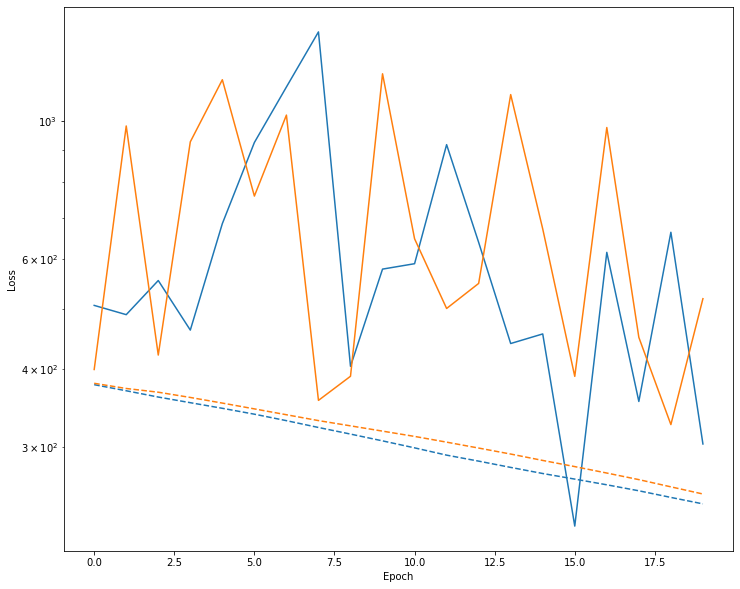

In [86]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [144]:
X_train = (X_train - X_train.mean())/(X_train.std())

In [145]:
pca = PCA(n_components=10)
pca.fit(X_train)
val = pca.transform(X_train)
X_trainPca = pd.DataFrame(val)
X_tr, X_val, y_tr, y_val = train_test_split(X_trainPca, y_train, test_size=0.2) 

# yy = pd.Series(y)
# yy = yy.replace(['pass', 'fail'], [0,1])

# yy = np.array(yy)
    
# model.fit(X_tr, y_tr)

In [146]:
tt = pd.Series(y_tr)
tt = tt.replace(['pass','fail'], [0, 1])

ff = pd.Series(y_val)
ff = ff.replace(['pass','fail'], [0, 1])


model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    np.array(X_tr), np.array(tt),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(np.array(X_val), np.array(ff)), class_weight={0:10, 1:5})

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 11.3875 - tp: 26.0000 - fp: 371.0000 - tn: 798.0000 - fn: 58.0000 - accuracy: 0.6576 - precision: 0.0655 - recall: 0.3095 - auc: 0.5284 - prc: 0.0695 - val_loss: 1.0859 - val_tp: 1.0000 - val_fp: 50.0000 - val_tn: 189.0000 - val_fn: 11.0000 - val_accuracy: 0.7570 - val_precision: 0.0196 - val_recall: 0.0833 - val_auc: 0.5084 - val_prc: 0.0446
Epoch 2/100
1/1 [==============================] - 0s 46ms/step - loss: 12.3344 - tp: 16.0000 - fp: 327.0000 - tn: 607.0000 - fn: 52.0000 - accuracy: 0.6218 - precision: 0.0466 - recall: 0.2353 - auc: 0.4309 - prc: 0.0568 - val_loss: 1.0760 - val_tp: 1.0000 - val_fp: 49.0000 - val_tn: 190.0000 - val_fn: 11.0000 - val_accuracy: 0.7610 - val_precision: 0.0200 - val_recall: 0.0833 - val_auc: 0.5070 - val_prc: 0.0445
Epoch 3/100
1/1 [==============================] - 0s 47ms/step - loss: 12.0866 - tp: 22.0000 - fp: 314.0000 - tn: 620.0000 - fn: 46.0000 - accuracy: 0.6407 - precision

Epoch 21/100
1/1 [==============================] - 0s 45ms/step - loss: 10.9987 - tp: 19.0000 - fp: 286.0000 - tn: 648.0000 - fn: 49.0000 - accuracy: 0.6657 - precision: 0.0623 - recall: 0.2794 - auc: 0.4620 - prc: 0.0650 - val_loss: 0.9151 - val_tp: 1.0000 - val_fp: 43.0000 - val_tn: 196.0000 - val_fn: 11.0000 - val_accuracy: 0.7849 - val_precision: 0.0227 - val_recall: 0.0833 - val_auc: 0.5056 - val_prc: 0.0449
Epoch 22/100
1/1 [==============================] - 0s 44ms/step - loss: 10.1389 - tp: 21.0000 - fp: 254.0000 - tn: 680.0000 - fn: 47.0000 - accuracy: 0.6996 - precision: 0.0764 - recall: 0.3088 - auc: 0.5202 - prc: 0.0738 - val_loss: 0.9074 - val_tp: 1.0000 - val_fp: 43.0000 - val_tn: 196.0000 - val_fn: 11.0000 - val_accuracy: 0.7849 - val_precision: 0.0227 - val_recall: 0.0833 - val_auc: 0.5040 - val_prc: 0.0449
Epoch 23/100
1/1 [==============================] - 0s 44ms/step - loss: 10.7246 - tp: 22.0000 - fp: 265.0000 - tn: 669.0000 - fn: 46.0000 - accuracy: 0.6896 - prec

Epoch 41/100
1/1 [==============================] - 0s 43ms/step - loss: 9.5011 - tp: 20.0000 - fp: 249.0000 - tn: 685.0000 - fn: 48.0000 - accuracy: 0.7036 - precision: 0.0743 - recall: 0.2941 - auc: 0.4998 - prc: 0.0674 - val_loss: 0.7686 - val_tp: 1.0000 - val_fp: 42.0000 - val_tn: 197.0000 - val_fn: 11.0000 - val_accuracy: 0.7888 - val_precision: 0.0233 - val_recall: 0.0833 - val_auc: 0.5073 - val_prc: 0.0453
Epoch 41: early stopping


In [147]:
def plot_metrics(history):
    metrics = ['loss', 'prc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])

        plt.legend()

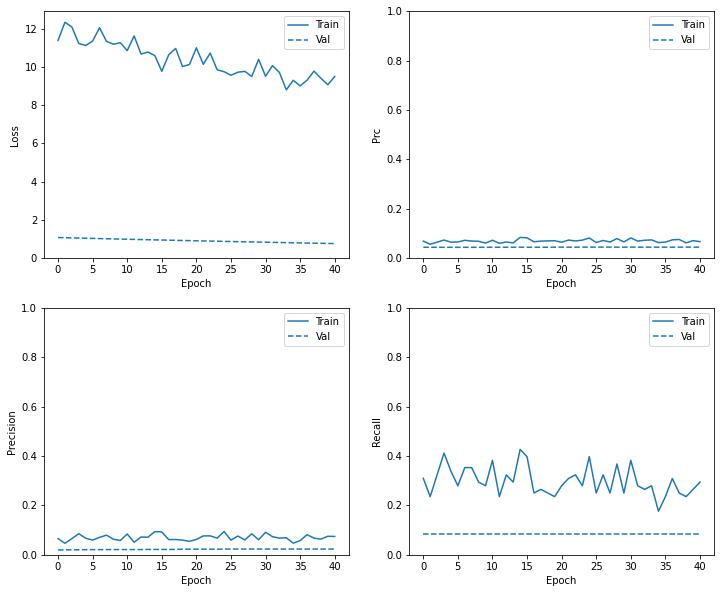

In [148]:
plot_metrics(baseline_history)

In [149]:
X_test = (X_test - X_test.mean())/( X_test.std())
pca = PCA(n_components=10)
pca.fit(X_test)
xTest = pca.transform(X_test)
# X_trainPca = pd.DataFrame(val)
# X_tr, X_val, y_tr, y_val = train_test_split(X_trainPca, y_train, test_size=0.2) 
train_predictions_baseline = model.predict(X_tr, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(xTest, batch_size=BATCH_SIZE)

1/1 [==============================] - 0s 30ms/step


In [150]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.7549968361854553
tp :  3.0
fp :  49.0
tn :  241.0
fn :  21.0
accuracy :  0.7770700454711914
precision :  0.057692307978868484
recall :  0.125
auc :  0.5660919547080994
prc :  0.08319497108459473

Legitimate Transactions Detected (True Negatives):  241
Legitimate Transactions Incorrectly Detected (False Positives):  49
Fraudulent Transactions Missed (False Negatives):  21
Fraudulent Transactions Detected (True Positives):  3
Total Fraudulent Transactions:  24


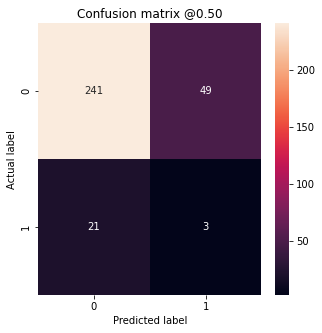

In [151]:
testData = pd.Series(y_test)
yTest = testData.replace(['pass', 'fail'], [0,1])
baseline_results = model.evaluate(xTest, yTest,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
print()

plot_cm(yTest, test_predictions_baseline)